In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph langchain_google_genai

In [2]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GOOGLE_API_KEY")

GOOGLE_API_KEY: ········


In [3]:
_set_env("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

LANGSMITH_API_KEY: ········


In [4]:
from pprint import pprint

from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(f"So you said, you were researching ocean mamals", name="bot")]
messages.append(HumanMessage(f"Yes, I know about whales, But what other should I learn about", name="M"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: M

Yes, I know about whales, But what other should I learn about


In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0) 
llm.invoke(messages)

AIMessage(content='Okay, great! Whales are a good start. To broaden your knowledge of ocean mammals, here\'s a breakdown of other fascinating groups you should learn about, along with some specific examples:\n\n**1. Dolphins and Porpoises (Cetaceans - Odontocetes):**\n\n*   **Why learn about them?** They are highly intelligent, social animals with complex communication systems. They are also very diverse.\n*   **Key Differences from Whales:** Generally smaller than whales, have conical teeth (whales often have baleen plates), and often have a more streamlined body shape.\n*   **Examples:**\n    *   **Bottlenose Dolphin:** The most well-known dolphin, often seen in aquariums and used in research.\n    *   **Spinner Dolphin:** Known for their acrobatic leaps out of the water.\n    *   **Orca (Killer Whale):** Technically a dolphin, the largest member of the dolphin family, and a highly intelligent apex predator.\n    *   **Harbor Porpoise:** Smaller and more elusive than dolphins, often 

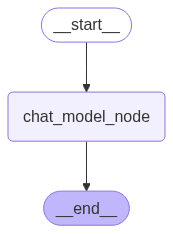

In [6]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

    
def chat_model_node(state: MessagesState):
    print("---chat_model_node---")
    return {"messages": llm.invoke(state["messages"])}
 

builder = StateGraph(MessagesState)

builder.add_node("chat_model_node", chat_model_node) 

builder.add_edge(START, "chat_model_node") 
builder.add_edge("chat_model_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
output = graph.invoke({"messages": messages})

for m in output["messages"]:
    m.pretty_print()

---chat_model_node---
================================== Ai Message ==================================
Name: bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: M

Yes, I know about whales, But what other should I learn about
================================== Ai Message ==================================

Okay, great! Whales are a good start. To broaden your knowledge of ocean mammals, here's a breakdown of other fascinating groups you should learn about, along with some specific examples:

**1. Dolphins and Porpoises (Cetaceans - Odontocetes):**

*   **Why learn about them?** They are highly intelligent, social animals with complex communication systems. They are also very diverse.
*   **Key Differences from Whales:** Generally smaller than whales, have conical teeth (whales often have baleen plates), and often have a more streamlined body shape.
*   **Examples:**
    *   **Bottlenose Dolphin:** Th

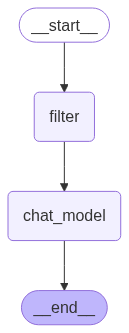

In [8]:
from langchain_core.messages import RemoveMessage

def filter_node(state: MessagesState):
    print("---filter_node---")
    delete_messages = [RemoveMessage(id = m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):
    print("---chat_model_node---")
    return {"messages": llm.invoke(state["messages"])}

builder = StateGraph(MessagesState)

builder.add_node("filter", filter_node) 
builder.add_node("chat_model", chat_model_node) 

builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [58]:
messages = [AIMessage("Hi", name = "Bot", id = "1")]
messages.append(HumanMessage("Hi.", name = "Lance", id = 2))
messages.append(AIMessage("So you said, you were researching ocean mamals", name = "Bot", id = 3))
messages.append(HumanMessage("Yes, I know about whales, But what other should I learn about?", name = "Lance", id = 4))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, I know about whales, But what other should I learn about?


In [59]:
output = graph.invoke({"messages": messages})

for m in output["messages"]:
    m.pretty_print()

---chat_model_node---
================================== Ai Message ==================================
Name: Bot

Hi
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, I know about whales, But what other should I learn about?
================================== Ai Message ==================================

Okay, great! Besides whales, the ocean is teeming with fascinating marine mammals. To give you the best recommendations, tell me a little more about what interests you. For example:

*   **What aspects of whales do you find most interesting?** (e.g., their size, their songs, their migration patterns, their social behavior, their conservation status)
*   **Are you interested in mammals that are similar to

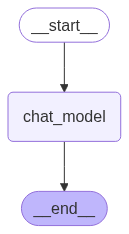

In [60]:
def chat_model_node(state: MessagesState):
    print("---chat_model_node---")
    return {"messages": llm.invoke(state["messages"][-1:])}
 

builder = StateGraph(MessagesState)

builder.add_node("chat_model", chat_model_node) 

builder.add_edge(START, "chat_model") 
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [61]:

messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Narwhals!", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, I know about whales, But what other should I learn about?
================================== Ai Message ==================================

Okay, great! Besides whales, the ocean is teeming with fascinating marine mammals. To give you the best recommendations, tell me a little more about what interests you. For example:

*   **What aspects of whales do you find most interesting?** (e.g., their size, their songs, their migration patterns, their social behavior, their conservation status)
*   **Are you interested in mammals that are similar to whales, or something 

In [62]:
output = graph.invoke({"messages": messages})

for m in output["messages"]:
    m.pretty_print()

---chat_model_node---
================================== Ai Message ==================================
Name: Bot

Hi
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, I know about whales, But what other should I learn about?
================================== Ai Message ==================================

Okay, great! Besides whales, the ocean is teeming with fascinating marine mammals. To give you the best recommendations, tell me a little more about what interests you. For example:

*   **What aspects of whales do you find most interesting?** (e.g., their size, their songs, their migration patterns, their social behavior, their conservation status)
*   **Are you interested in mammals that are similar to

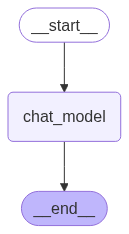

In [63]:
from langchain_core.messages import trim_messages

def chat_model_node(state: MessagesState):
    print("---chat_model_node---")
    messages = trim_messages(
        state["messages"],
        max_tokens = 100,
        strategy = "last",
        token_counter=ChatGoogleGenerativeAI(model="gemini-2.0-flash"),
        allow_partial=True
    )
    return {"messages": llm.invoke(messages)}
 

builder = StateGraph(MessagesState)

builder.add_node("chat_model", chat_model_node) 

builder.add_edge(START, "chat_model") 
builder.add_edge("chat_model", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [64]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas Live!", name="Lance"))

for m in messages:
    m.pretty_print()


================================== Ai Message ==================================
Name: Bot

Hi
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, I know about whales, But what other should I learn about?
================================== Ai Message ==================================

Okay, great! Besides whales, the ocean is teeming with fascinating marine mammals. To give you the best recommendations, tell me a little more about what interests you. For example:

*   **What aspects of whales do you find most interesting?** (e.g., their size, their songs, their migration patterns, their social behavior, their conservation status)
*   **Are you interested in mammals that are similar to whales, or something 

In [41]:
trim_messages(
        messages,
        max_tokens = 100,
        strategy = "last",
        token_counter=ChatGoogleGenerativeAI(model="gemini-2.0-flash"),
        allow_partial=True
    )
 

[AIMessage(content='\n*   **Polar Regions:** They are commonly found in the Arctic and Antarctic waters.\n*   **Temperate Waters:** They inhabit areas like the coasts of North America, Europe, and South America.\n*   **Tropical and Subtropical Waters:** While less common, they can also be found in warmer waters like the Gulf of Mexico, the Mediterranean Sea, and around the Galapagos Islands.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--2fa5b5fe-d7c8-494a-9b17-44dfc065bf4f-0', usage_metadata={'input_tokens': 89, 'output_tokens': 111, 'total_tokens': 200, 'input_token_details': {'cache_read': 0}}),
 HumanMessage(content='Tell me where Orcas Live!', additional_kwargs={}, response_metadata={}, name='Lance')]

In [42]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, I know about whales, But what other should I learn about?
================================== Ai Message ==================================

Alright, let's dive into the fascinating world of Narwhals! Here's a breakdown of what makes these creatures so unique:

**Basic Facts:**

*   **Scientific Name:** *Monodon monoceros* (meaning "one tooth, one horn")
*   **Common Name:** Narwhal
*   **Size:** Adults typically range from 13 to 18 feet (4 to 5.5 meters) in length, excluding the tusk.
*   **Weight:** They can weigh between 1,750 and 3,500 pounds (800 to 1,600 kil

In [65]:
output = graph.invoke({"messages": messages})

for m in output["messages"]:
    m.pretty_print()

---chat_model_node---
================================== Ai Message ==================================
Name: Bot

Hi
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said, you were researching ocean mamals
================================ Human Message =================================
Name: Lance

Yes, I know about whales, But what other should I learn about?
================================== Ai Message ==================================

Okay, great! Besides whales, the ocean is teeming with fascinating marine mammals. To give you the best recommendations, tell me a little more about what interests you. For example:

*   **What aspects of whales do you find most interesting?** (e.g., their size, their songs, their migration patterns, their social behavior, their conservation status)
*   **Are you interested in mammals that are similar to